# Using deep features to train an image classifier

In [4]:
import turicreate

# Load some data

In [5]:
image_train = turicreate.SFrame('~/data/image_train_data/')
image_test = turicreate.SFrame('~/data/image_test_data/')

# Explore this image data

In [6]:
image_train['image'].explore()

Materializing SFrame...

Done.

# Train an image classifier on raw image pixels

In [7]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1905

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 6        | 0.000016  | 1.402730     | 0.359580          | 0.360000            |

| 2         | 8        | 1.000000  | 1.570486     | 0.386352          | 0.400000            |

| 3         | 9        | 1.000000  | 1.683089     | 0.424147          | 0.360000            |

| 4         | 10       | 1.000000  | 1.795899     | 0.437795          | 0.370000            |

| 5         | 11       | 1.000000  | 1.910908     | 0.445144          | 0.360000            |

| 6         | 12       | 1.000000  | 2.024394     | 0.466142          | 0.400000            |

| 10        | 16       | 1.000000  | 2.478739     | 0.512861          | 0.440000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

# Make predictions using simple raw pixel model

In [ ]:
image_test[0:3]['image'].explore()

In [9]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [10]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [11]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.47525, 'auc': 0.7185244583333309, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       dog       |  401  |
 |     cat      |       dog       |  278  |
 |     dog      |    automobile   |  115  |
 |     dog      |       cat       |  262  |
 |     cat      |       cat       |  363  |
 |  automobile  |       bird      |  106  |
 |     bird     |       bird      |  504  |
 |     bird     |       dog       |  161  |
 |     bird     |       cat       |  182  |
 |     cat      |    automobile   |  167  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.47309770303491966, 'log_loss': 1.2138398483666968, 'precision': 

# Train image classifier using deep features

In [13]:
len(image_train)

2005

In [14]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [15]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Given the deep features, train a logistic classifier

In [16]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.243412     | 0.744748          | 0.693069            |

| 1         | 7        | 0.125000  | 0.637518     | 0.776786          | 0.702970            |

| 2         | 8        | 0.156250  | 0.793582     | 0.777836          | 0.702970            |

| 3         | 12       | 0.468750  | 1.144112     | 0.809874          | 0.722772            |

| 4         | 14       | 0.548712  | 1.360881     | 0.832458          | 0.722772            |

| 9         | 21       | 1.000000  | 2.275294     | 0.909139          | 0.732673            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images

,SArray
0,
1,
2,

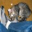
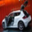
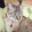

In [17]:
image_test[0:3]['image'].explore()

In [18]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [19]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79275,
 'auc': 0.9414867499999977,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   13  |
 |     bird     |       dog       |   64  |
 |     dog      |       cat       |  200  |
 |  automobile  |       cat       |   18  |
 |     dog      |       bird      |   45  |
 |     cat      |    automobile   |   19  |
 |     cat      |       cat       |  673  |
 |     bird     |       cat       |  122  |
 |     cat      |       dog       |  239  |
 |     dog      |       dog       |  742  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7936611924927245,
 'log_loss': 0.5879840016980584,
 'precisio

## Quiz

In [21]:
sketch = turicreate.Sketch(image_train['label'])

In [22]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [26]:
dogs = image_train[image_train['label'] == 'dog']
dog_model = turicreate.nearest_neighbors.create(dogs, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [27]:
cats = image_train[image_train['label'] == 'cat']
cat_model = turicreate.nearest_neighbors.create(cats, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [28]:
automobiles = image_train[image_train['label'] == 'automobile']
automobile_model = turicreate.nearest_neighbors.create(automobiles, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [29]:
birds = image_train[image_train['label'] == 'bird']
bird_model = turicreate.nearest_neighbors.create(birds, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [57]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.697ms      |

| Done         |         | 100         | 40.056ms     |

+--------------+---------+-------------+--------------+

,query_label,reference_label,distance,rank
0,0,16289,34.623719,1
1,0,45646,36.006880,2
2,0,32139,36.520081,3
3,0,25713,36.754850,4
4,0,331,36.873123,5


,SArray
0,

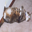

In [58]:
image_train[image_train['id'] == 16289]['image'].explore()

In [33]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.596ms      |

| Done         |         | 100         | 34.363ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

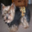

In [59]:
image_train[image_train['id'] == 16976]['image'].explore()

In [40]:
nearest_cats = cat_model.query(image_test[0:1])
nearest_cats['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.371ms      |

| Done         |         | 100         | 46.231ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [41]:
nearest_dogs = dog_model.query(image_test[0:1])
nearest_dogs['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.369ms      |

| Done         |         | 100         | 37.419ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

In [43]:
test_dogs = image_test[image_test['label'] == 'dog']
test_cats = image_test[image_test['label'] == 'cat']
test_automobiles = image_test[image_test['label'] == 'automobile']
test_birds = image_test[image_test['label'] == 'bird']

In [46]:
dog_cat_neighbors = cat_model.query(test_dogs, k=1)
dog_automobile_neighbors = automobile_model.query(test_dogs, k=1)
dog_bird_neighbors = bird_model.query(test_dogs, k=1)
dog_dog_neighbors = dog_model.query(test_dogs, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 334.754ms    |

| Done         | 509000  | 100         | 370.757ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 336.657ms    |

| Done         | 509000  | 100         | 410.591ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 304.142ms    |

| Done         | 478000  | 100         | 336.079ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 311.317ms    |

| Done         | 509000  | 100         | 349.482ms    |

+--------------+---------+-------------+--------------+

In [48]:
distances = turicreate.SFrame({
    'dog-dog': dog_dog_neighbors['distance'],
    'dog-cat': dog_cat_neighbors['distance'],
    'dog-automobile': dog_automobile_neighbors['distance'],
    'dog-bird': dog_bird_neighbors['distance'],
})

In [50]:
distances

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [54]:
def is_dog_correct(row):
    dog = row['dog-dog']
    cat = row['dog-cat']
    automobile = row['dog-automobile']
    bird = row['dog-bird']
    
    if dog < min([cat, automobile, bird]):
        return 1
    else:
        return 0

In [55]:
distances.apply(is_dog_correct).sum()

678

In [56]:
len(test_dogs)

1000